<a href="https://colab.research.google.com/github/Rostyslaw1/Demianov/blob/main/Laboratory3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Продемонструвати роботу багатокубітних гейтів та пояснити їхню роботу

# Інсталяція залежностей (середовище)

In [ ]:
!pip install qiskit
!pip install pylatexenc
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import Aer 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 14.4 MB/s 
     |████████████████████████████████| 19.2 MB 6.1 MB/s 
     |████████████████████████████████| 240 kB 45.7 MB/s 
     |████████████████████████████████| 106 kB 46.4 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 943 kB 50.9 MB/s 
     |████████████████████████████████| 37.5 MB 45 kB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 4.1 MB 39.0 MB/s 
     |████████████████████████████████| 1.9 MB 52.4 MB/s 
     |████████████████████████████████| 112 kB 74.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.1-py3-none-any.whl size=12224 sha256=b65f1b3d158424a6b9e33498300cbfdefa2938aee0e2110ad471a94a76153fda
  Stored in directory: /root/.cache/pip/wheels/5a/65/57/e93e8

Встановлення з'єднання з симулятором

In [ ]:
backend = Aer.get_backend('statevector_simulator')

# Гейт CNOT

CNOT-ворота - це ворота, що проводять операцію X-воріт над цільовим кубітом, якщо контрольований кубіт в стані |1>.

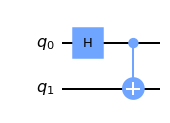

In [ ]:
#CNOT gate 
cnot_circuit = QuantumCircuit(2)

cnot_circuit.h(0)
cnot_circuit.cx(0, 1)

cnot_circuit.draw('mpl')

Візуалізуємо стан кубіта за допомогою сфери та гістограми

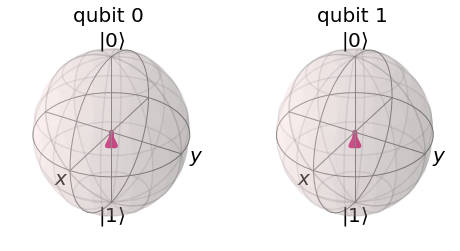

In [ ]:
state_vector = execute(cnot_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

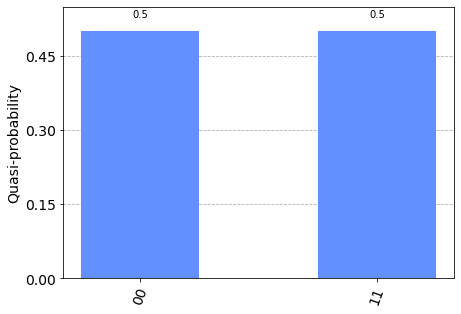

In [ ]:
counts = execute(cnot_circuit, backend).result().get_counts(cnot_circuit)
plot_histogram(counts)

# Контрольовані Т - Гейти

CU1-ворота - це умовні T-ворота, що застосовують операцію T-воріт над цільовим кубітом, якщо контролюючий кубіт перебуває в стані |1>.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  """


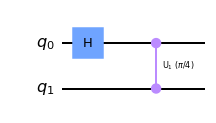

In [ ]:
#Controlled T Gate
ct_circuit = QuantumCircuit(2)

ct_circuit.h(0)
ct_circuit.cu1(pi / 4, 0, 1)

ct_circuit.draw('mpl')

Візуалізуємо результати за допомогою сфери та гістограми

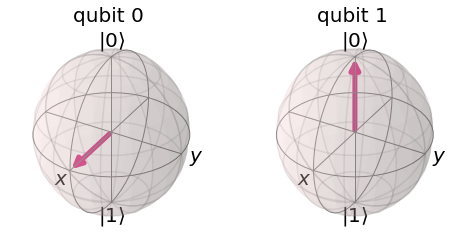

In [ ]:
state_vector = execute(ct_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

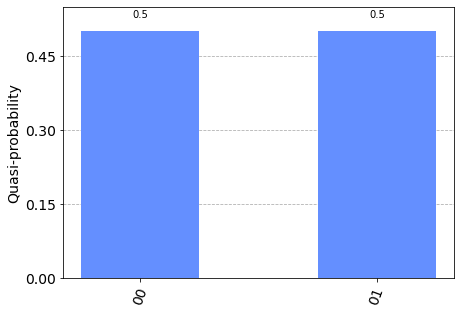

In [ ]:
counts = execute(ct_circuit, backend, shots = 1024).result().get_counts()
plot_histogram(counts)

# Контрольовані Z - Гейти

CZ-ворота - це також умовні ворота, що застосовують операцію Z-воріт наж цільовим кубітом, якщо контролюючий кубіт в стані |1>.

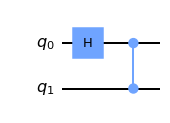

In [ ]:
#Controlled Z Gate
cz_circuit = QuantumCircuit(2)

cz_circuit.h(0)
cz_circuit.cz(0, 1)

cz_circuit.draw('mpl')

Продовєжуємо візуалізацію результатів

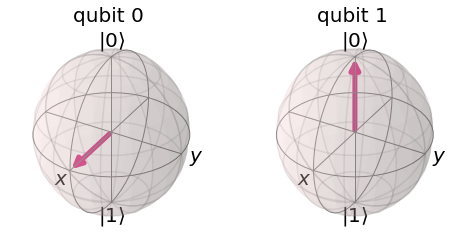

In [ ]:
state_vector = execute(cz_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

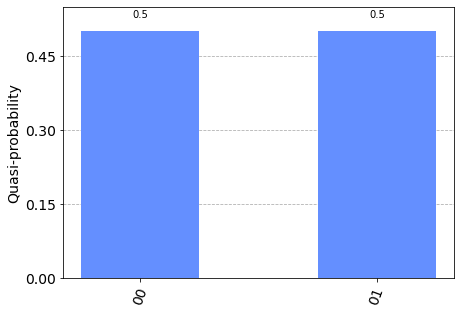

In [ ]:
counts = execute(cz_circuit, backend, shots = 1024).result().get_counts()
plot_histogram(counts)

# SWAP - Гейти

SWAP-ворота - ворота, що дозволяють обмінятись двом кубітом між собою власними станами.

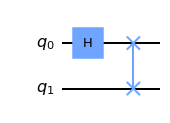

In [ ]:
#SWAP Gate
swap_circuit = QuantumCircuit(2)

swap_circuit.h(0)
swap_circuit.swap(0, 1)

swap_circuit.draw('mpl')

Візуалізуємо результати виконання схеми

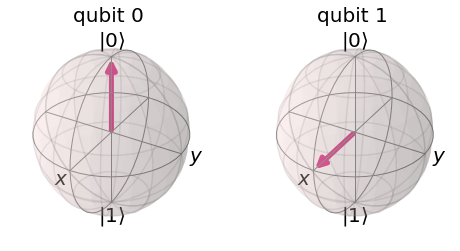

In [ ]:
state_vector = execute(swap_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

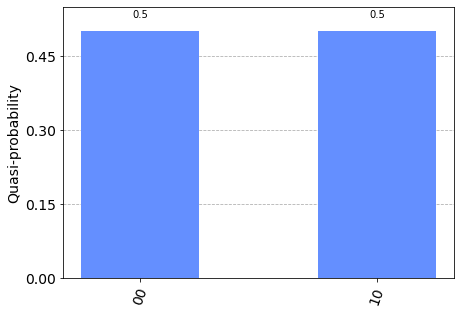

In [ ]:
counts = execute(swap_circuit, backend, shots = 1024).result().get_counts()
plot_histogram(counts)

# Контрольовані обертання

Створимо контрольовані обертання стану довкола осей кубіта.

Для початку реалізуємо обертання довкола осі Y. Потрібно реалізувати наступну послідовність воріт.

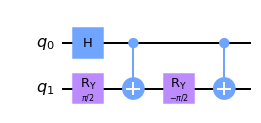

In [ ]:
#Controlled reverse
cyr_circuit = QuantumCircuit(2)

cyr_circuit.h(0)

cyr_circuit.ry(pi / 2, 1)
cyr_circuit.cx(0, 1)
cyr_circuit.ry(-pi / 2, 1)
cyr_circuit.cx(0, 1)

cyr_circuit.draw('mpl')

Якщо контролюючий кубіт q0 в стані |0>, все що відбудеться, це операція Ry(θ/2) за якою одразу слідує її інверсія Ry(-θ/2). Це не створить жодного ефекту. Якщо контролюючий кубіт в стані |1>, то після операції Ry(-θ/2) послідуватиме операція X-воріт. Це створить ефект переключення напрямку Y обертання та виконає наступну операцію Ry(θ/2). Кінцевий ефект, це контрольована операція Ry(θ/2) над цільовим кубітом, якщо контролюючий в стані |1>.

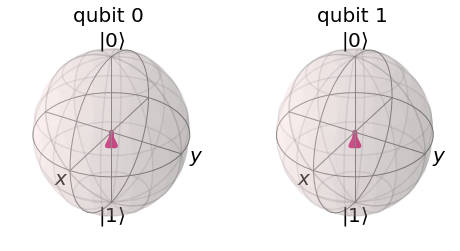

In [ ]:
state_vector = execute(cyr_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

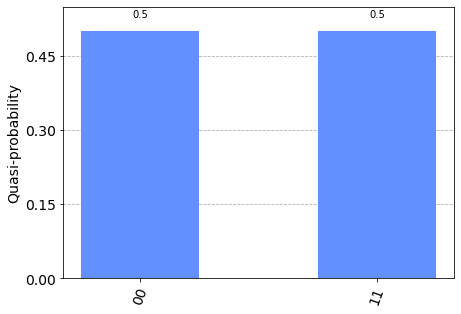

In [ ]:
counts = execute(cyr_circuit, backend, shots = 1024).result().get_counts()
plot_histogram(counts)

Так само можна реалізувати обертання по осі X та Z.

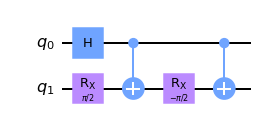

In [ ]:
#Z an X
cxr_circuit = QuantumCircuit(2)

cxr_circuit.h(0)

cxr_circuit.rx(pi / 2, 1)
cxr_circuit.cx(0, 1)
cxr_circuit.rx(-pi / 2, 1)
cxr_circuit.cx(0, 1)

cxr_circuit.draw('mpl')

Візуалізуємо результати виконання

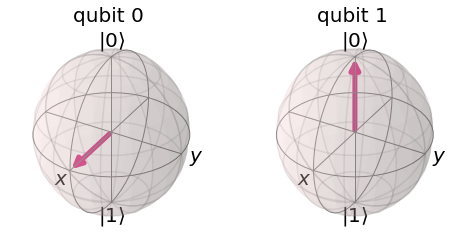

In [ ]:
state_vector = execute(cxr_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

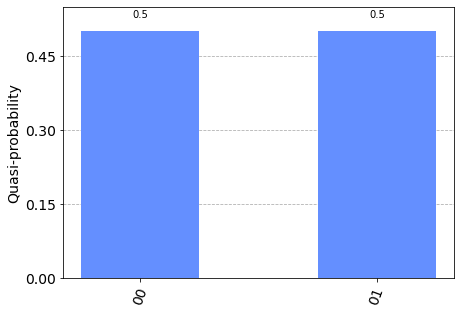

In [ ]:
counts = execute(cxr_circuit, backend, shots = 1024).result().get_counts()
plot_histogram(counts)

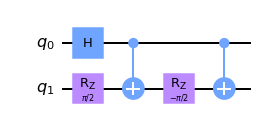

In [ ]:
# Z scheme
czr_circuit = QuantumCircuit(2)

czr_circuit.h(0)

czr_circuit.rz(pi / 2, 1)
czr_circuit.cx(0, 1)
czr_circuit.rz(-pi / 2, 1)
czr_circuit.cx(0, 1)

czr_circuit.draw('mpl')

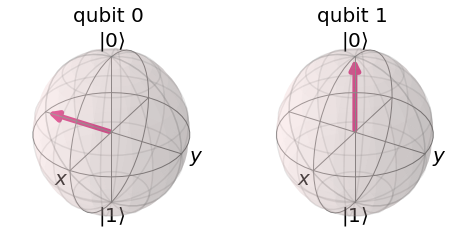

In [ ]:
state_vector = execute(czr_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

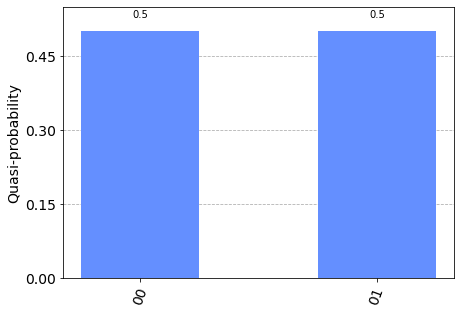

In [ ]:
counts = execute(czr_circuit, backend, shots = 1024).result().get_counts()
plot_histogram(counts)

# Гейт TOFFOLI

Toffoli-ворота - це трикубітні ворота, що використовують два кубіта як контрольні над одним цільовим кубітом. Вони застосовують X-ворота тільки тоді коли два контролюючих кубіта в стані |1>. Кінцевий результат в цільовому кубіті дорівнюватиме класичним AND або NAND двох контролюючих кубітів, в залежності від початкового стану цільового кубіту |0> або |1>. Toffoli також може бути як контрольовані-контрольовані-X-ворота - CCX-ворота.

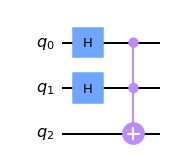

In [ ]:
#Toffoli Gates
ccx_circuit = QuantumCircuit(3)

ccx_circuit.h(0)
ccx_circuit.h(1)

ccx_circuit.ccx(0, 1, 2)

ccx_circuit.draw('mpl')

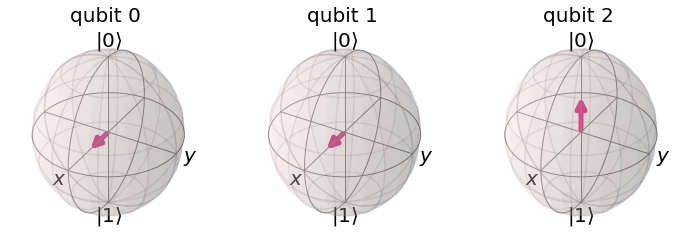

In [ ]:
state_vector = execute(ccx_circuit, backend).result().get_statevector()
plot_bloch_multivector(state_vector)

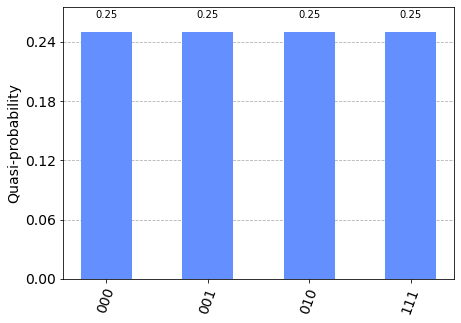

In [ ]:
counts = execute(ccx_circuit, backend, shots = 1024).result().get_counts()
plot_histogram(counts)